주 목적은 탐색적 분석을 위한 시각화

#### pandas 내장 그래프 도구
- pandas는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서<br>
    별도로 임포트하지 않고 간단히 그래프를 그릴 수 있음<br>
    <br>
- 선 그래프: dfname.plot()<br>
    메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 그래프를 그림<br>
    <br>
- 막대 그래프: dfname.plot(kind='bar')<br>
    (활용) dfname.plot(kind='barh', stacked=True, alpha=0.8)<br>
    (barh = bar horizental)<br>
    <br>
- 히스토그램: dfname.plot(kind='hist) # 구간별 빈도 보여주기<br>
<br>
- 산점도: dfname.plot(x='',y='', kind='scatter')<br>
    상관관계를 볼 수 있음<br>
<br>
- 박스 플롯: dfname.plot(kind='box')<br>
    (활용) dfname.boxplot(column=['colname']) # 특정 컬럼에 대해 데이터 분포와 분산 정도를 제공<br>
<br>

#### matplotlib
- import matplotlib.pyplot as plt
- 히스토그램: plt.hist(x, bins=n)
- 선 그래프: plt.plot(x,y)
- 막대 그래프: plt.bar(x,,y, color='')
- 산점도(scatter plot): plt.scatter(x,y)
<br>

#### seaborn
- import seaborn as sns
- matplotlib 보다 좀 더 세련된 기능 제공
- sns.distplot(data, bins=, color=,kde=)
- sns.boxplot(x,y, data, color)
- sns.violinplot(x,y, data, color) # x,y의 데이터 분포까지 박스 플롯에 같이 표시해 줌
- sns.barplot(x,y, data, color)
- sns.joinplot(x,y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y, data, color) # linear model 선형 모델에 대한 플롯
- sns.regplot(x,y, data, fig_reg=False) # 회귀분석 모델에 대한 플롯<br>
https://seaborn.pydata.org/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset/주가데이터.csv')
df['Date'] = pd.to_datetime(df['연월일'])
df.drop(['연월일','전일종가'],axis=1,inplace=True)
df.columns=['Close','Start','High','Low','Volume','Date']
col = ['Date','Close','Start','High','Low','Volume']
df = pd.DataFrame(df,columns = ['Date','Close','Start','High','Low','Volume'])
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Close   20 non-null     int64         
 2   Start   20 non-null     int64         
 3   High    20 non-null     int64         
 4   Low     20 non-null     int64         
 5   Volume  20 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.1 KB


In [4]:
df.set_index('Date',inplace=True)
df.sort_index(ascending=True,inplace=True)
print(type(df.index))
df.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Close,Start,High,Low,Volume
Date,,,,,
2018-06-01,11900,11800,12100,11750,32062
2018-06-04,11900,11900,12200,11700,25171
2018-06-05,12150,11800,12250,11800,42485
2018-06-07,11950,12200,12300,11900,49088
2018-06-08,11950,11950,12200,11800,59258


In [5]:
df1 = df.copy()
df1.drop('Volume',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
Date,,,,
2018-06-01,11900,11800,12100,11750
2018-06-04,11900,11900,12200,11700
2018-06-05,12150,11800,12250,11800
2018-06-07,11950,12200,12300,11900
2018-06-08,11950,11950,12200,11800


<AxesSubplot:xlabel='Date'>

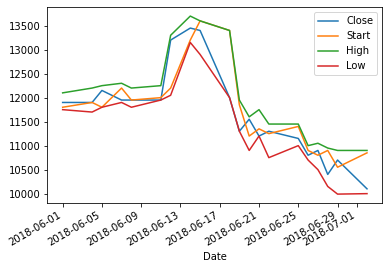

In [6]:
# 선 그래프
df1.plot() # 단타 가즈아~ (는 한강 지름길 ㅋㅋ~)

<AxesSubplot:xlabel='Date'>

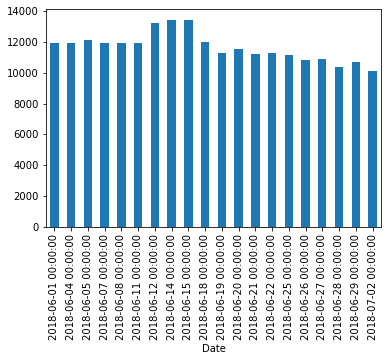

In [7]:
# 막대 그래프 (컬럼 하나를 선택해서 표시)
df1.Close.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

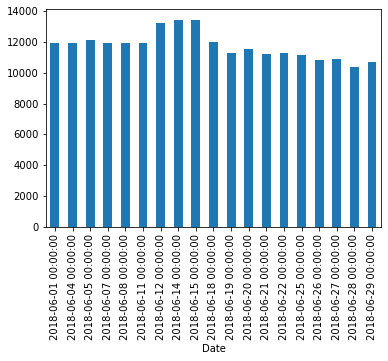

In [8]:
# [연습문제] 6월 종가만 뽑아서 막대 그래프로 표현

# 데이트 타임 인덱스는 인덱싱이 가능함!
# df1.loc['2018'] 하면 연도가 싹 다 나오고
# df1.loc['2018-07'] 하면 해당 월 싹 나오고

# 활로는 늘 있다
# 너무 어렵게 생각하지 말기!

df1.loc['2018-06'].Close.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

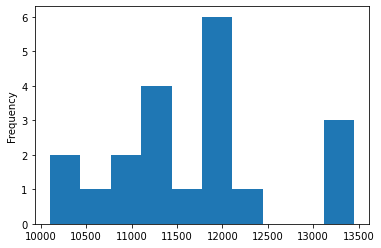

In [9]:
# 히스토그램
df1.Close.plot(kind='hist') # 구간 별 빈도를 보여줍니다

<AxesSubplot:ylabel='Frequency'>

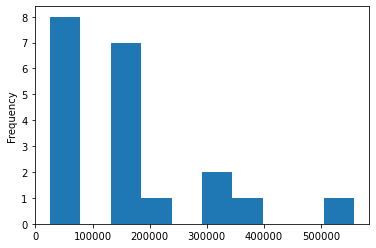

In [10]:
# 히스토그램
df.Volume.plot(kind='hist')

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Date'>

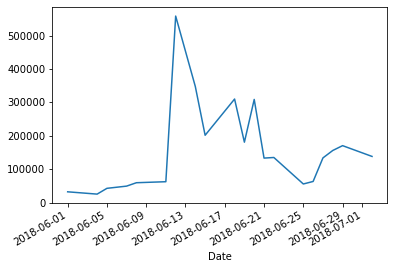

In [11]:
display(df.Volume.describe())
df.Volume.plot() # 오른쪽으로 치우친 그래프가 나올 것임을 예상 가능

<AxesSubplot:xlabel='Volume', ylabel='Count'>

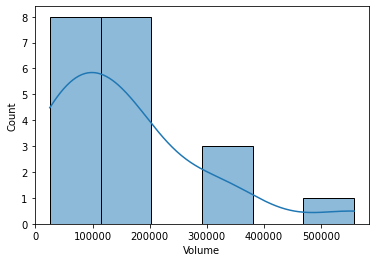

In [12]:
# 씨본 버전 히스토그램
sns.histplot(df.Volume,kde=True)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

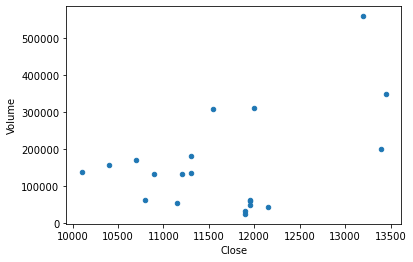

In [13]:
# 산점도
df.plot(x='Close',y='Volume',kind='scatter')
# 산점도, 점이 산개해 있는 표
# 좀 많이 산개해 있긴 한데 일단 종가가 낮을수록 볼륨이 적을 확률이 크다는 거임

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64


<AxesSubplot:>

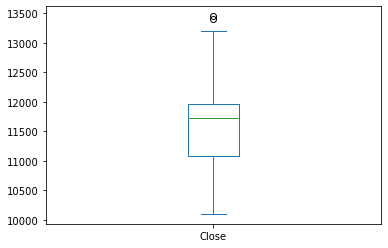

In [14]:
# 박스 플롯
# 종가의 데이터 분포를 보여줌
print(df.Close.describe())
df.Close.plot(kind='box')
# 중앙값이 평균과 살짝 비슷함
# 맥스값과 최저값 사이의 중간치보다 평균이 낮기 때문에 박스가 조금 내려와 있음
# 박스는 1분위(25%)와 3분위(75%) 사이를 나타내고 있음. 초록선은 중앙값.

#### Box Plot 해석 방법
- IQR(Inter Quartile Range): 제3사분위수(Q3) - 제1사분위수(Q1) (쿼터는 1/4이니까)
- lower whisker: Q1 - (1.5*IQR) 이내인 값 중에서 최솟값
- upper whisker: Q3 + (1.5*IQR) 이내인 값 중에서 최댓값
- 이상치: lower whisker, upper whisker를 벗어나는 값
<br>
<img src='이상치.png'>
여기 노란색 체크한 값이 이상치임<br>
데이터 내의 최댓값이긴 하지만 통계적으로 데이터를 흐릴 가능성이 있는 값이란 뜻임

In [15]:
# 이상치, 뭔가 정상적이지 않은, 에러 같은 값이 있으면 데이터가 왜곡이 됨
# 휴먼 에러(사람이 하는 실수, 데이터 오입력이라든지)도 포함
# 그래서 이상치를 찾아내서 제거해야 하는데 만약 이게 이상치가 아니라 정상적인 수치였다면?
# 뭐 한 회사의 월급을 통계를 냈는데 회장 월급도 포함이 되어서 값이 팍 뛴 거야
# 근데 회장도 회사의 일원이지? 그래서 이상치가 아니란 거야
# 저 휘스커 사용법은, 이상치의 범위를 정해주는 거라고 보면 됨. 이거 벗어나면 유의해서 봐라.

In [16]:
# [연습문제] Close 컬럼의 이상치를 구해봅시다
print(df.Close.describe())
# Q1 = 11087.5, Q3 = 11962.5
# IQR = Q3-Q1 = 875 (1.5배 하면 1312.5)
# lower whisker = Q1-1.5*IQR = 9775 이상인 값 중 최솟값
# upper whisker = Q3+1.5*IQR = 13275 이하인 값 중 최댓값
dfc = df.sort_values(by='Close')
dfc.loc[(dfc.Close>13275)|(dfc.Close<9775),'Close']

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64


Date
2018-06-15    13400
2018-06-14    13450
Name: Close, dtype: int64

In [17]:
# 조남현 님의 풀이
Q1 = df.Close.quantile(.25)
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
print(Q3 + 1.5 * IQR)
df.Close.loc[(df.Close > Q3 + 1.5 * IQR)|(df.Close < Q1 - 1.5 * IQR)]

13275.0


Date
2018-06-14    13450
2018-06-15    13400
Name: Close, dtype: int64

(array([1., 3., 2., 2., 2., 2., 2., 3., 6., 2., 3., 2., 4., 3., 1., 4., 3.,
        1., 2., 2.]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ,
        31.7, 34.4, 37.1, 39.8, 42.5, 45.2, 47.9, 50.6, 53.3, 56. ]),
 <BarContainer object of 20 artists>)

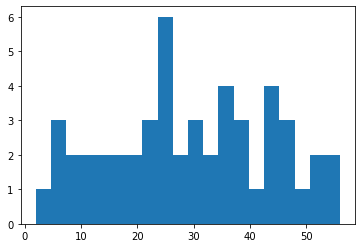

In [18]:
# matplotlib 뿌개기 - 히스토그램
np.random.seed(0)
data = np.arange(50)+np.random.randint(1,10,size=50)
plt.hist(data,bins=20) # 막대기 20개가 병렬로 붙은 모양

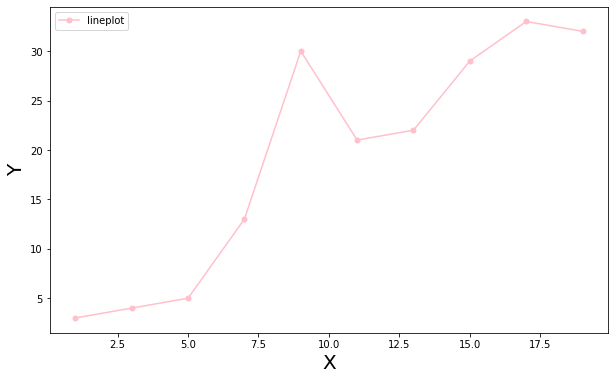

In [19]:
# matplotlib 뿌개기 - 선 그래프
x = np.arange(1,21,2)
y = np.array([3,4,5,13,30,21,22,29,33,32])
plt.figure(figsize=(10,6))
plt.plot(x,y,color='pink',marker='o',markersize=5)
plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)
plt.legend(labels=['lineplot']) # 범례...? 김점례...?

Text(0.5, 1.0, 'Line Graph')

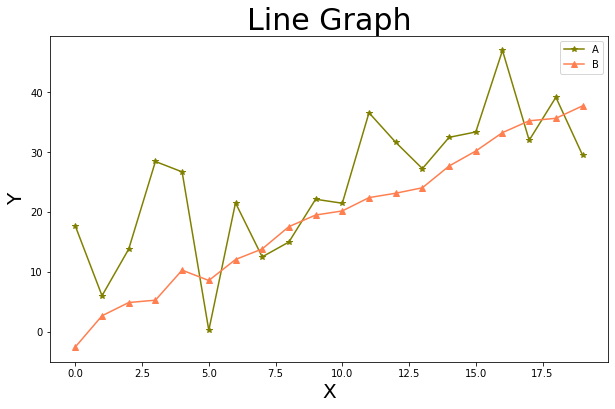

In [20]:
# matplotlib 뿌개기 - 선 그래프 심화
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2+np.random.randn(20)*10 # y1의 오차값을 10배 더 크게 주었다
y2 = np.arange(20)*2+np.random.randn(20)

plt.figure(figsize=(10,6))
plt.plot(x,y1,color='olive',marker='*',markersize=6) # 올리브 색의 오차가 더 심하다
plt.plot(x,y2,color='coral',marker='^',markersize=6)
plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)
plt.legend(labels=['A','B']) # 범례...? 김점례...?
plt.title('Line Graph',size=30)

Text(0.5, 0, 'X')

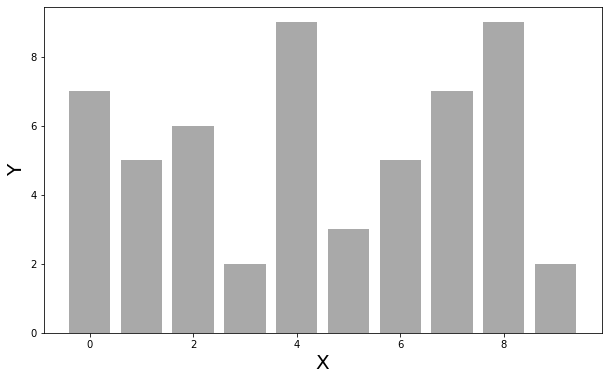

In [21]:
# matplotlib 뿌개기 - 막대 그래프
np.random.seed(1)
y = np.random.randint(2,10,size=10)
x = range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.8, color='darkgray')
plt.ylabel('Y',size = 20)
plt.xlabel('X',size = 20)

In [22]:
mv = pd.read_csv('./dataset/movie.csv')
mv.head()

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

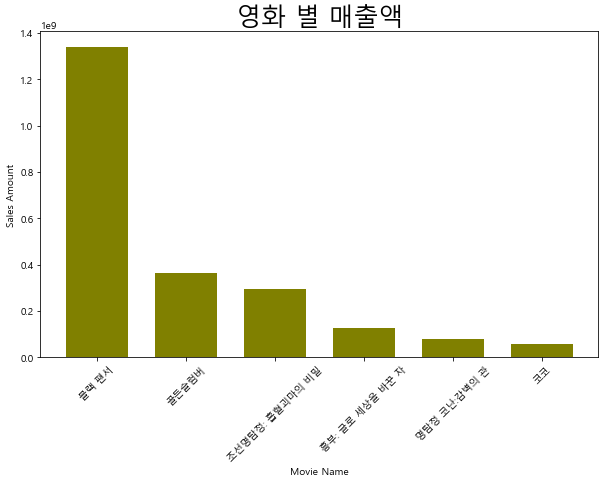

In [23]:
# 겸사겸사 한글 폰트 설정도 해보자구
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic') # 한글 맑은고딕으로 출력한다는 뜻
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위 처리
x = mv.movieNm
y = mv.salesAmt
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.7,color='olive')
plt.title('영화 별 매출액',size=25)
plt.xlabel('Movie Name')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45) # x 축 라벨 45도 얼짱각도로 표기하기

Text(0, 0.5, 'Weight')

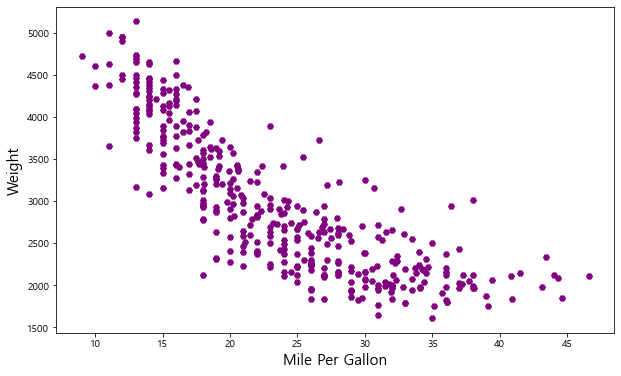

In [24]:
# matplotlib 뿌개기 - 산점도
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl') # opemptxl프로그램으로 실행해'줘'
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='purple',marker='H')
plt.xlabel('Mile Per Gallon',size=15)
plt.ylabel('Weight',size=15)
# 음의 상관관계인 것이 한 눈에 보인다~

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

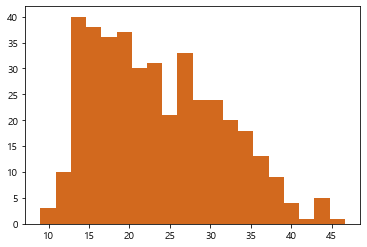

In [25]:
# matplotlib 뿌개기 - 히스토그램
plt.hist(x,bins=20,color='chocolate')

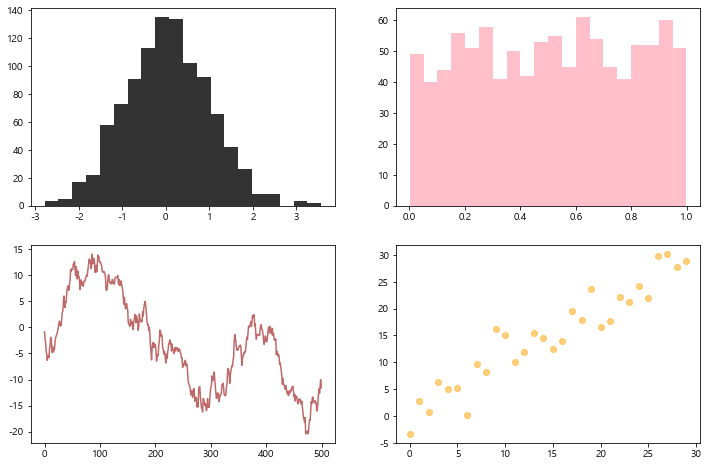

In [26]:
# 여러 개를 한 번에 그리는 subplot
fig = plt.figure(figsize=(12,8))
# figure가 2*2 크기인 4개의 서브플롯
ax1 = fig.add_subplot(2,2,1) # 2행 2열의 1번째, 1사분면
ax2 = fig.add_subplot(2,2,2) # 2사분면
ax3 = fig.add_subplot(2,2,3) # 3사분면
ax4 = fig.add_subplot(2,2,4) # 4사분면

ax1.hist(np.random.randn(1000),bins=20,color='k',alpha=0.8)
ax2.hist(np.random.rand(1000),bins=20,color='pink',alpha=1)
ax3.plot(np.random.randn(500).cumsum(),color='brown',alpha=0.7) # 누적 그래프
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30),color='orange',alpha=0.5)

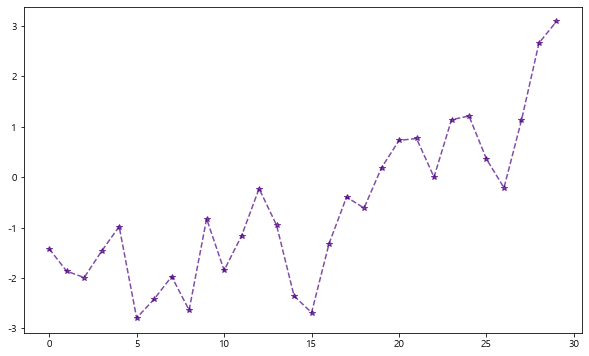

In [27]:
plt.figure(figsize=(10,6))
plt.plot(np.random.randn(30).cumsum(),linestyle='dashed',color='indigo',marker='*',alpha=0.7)

In [28]:
t3 = pd.read_csv('./dataset/titanic3.csv') # 도메인 조사를 좀 해야 함
# 이름에서 나이 결측치를 추리할 수 있음. 미스, 마스터, 미세스 등등
t3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [29]:
def catage(age):
    cat = ''
    if age<10: cat='Child'
    elif age<20: cat='Teen'
    elif age<30: cat='20s'
    elif age<40: cat='30s'
    elif age<50: cat='40s'
    elif age<60: cat='50s'
    else: cat='Eldery'
    return cat
t3['age_cat'] = t3.age.apply(lambda x:catage(x))
t3[['age','age_cat']].head()

,age,age_cat
0,29.00,20s
1,0.92,Child
2,2.00,Child
3,30.00,30s
4,25.00,20s


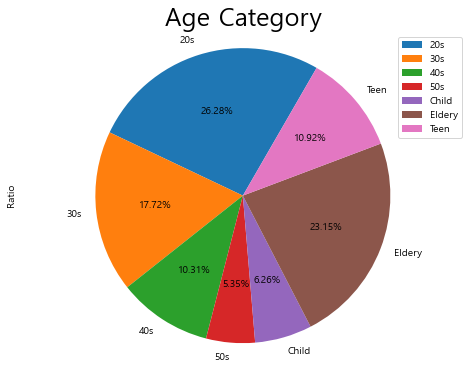

In [30]:
# age_cat을 파이 그래프로 만들어보자
# 유의해야 할 점이, ratio를 꼭 설정해 주어야 함
# ratio의 총합은 늘 1인 걸 염두에 두고 진행합시당
# 비율을 구하기 위해 각 나이대별 인원수를 구해보자

t3['Ratio'] = 1 # 머릿수라고 생각하면 됨. 각 사람당 1씩 가지고 갔다
df_age_cat = t3.groupby('age_cat').sum() # Ratio의 최종 합은 1309
df_age_cat.Ratio.plot(kind='pie',
                     figsize=(8,6),
                     autopct='%.2f%%', # 자동으로 퍼센티지 계산해서 소수점 2번째 자리까지
                     startangle=60) # 파이 그래프 처음 시작하는 각도는 60도
plt.title('Age Category',size=25)
plt.axis('equal')
plt.legend(labels=df_age_cat.index,loc='best') # 라벨은 그룹바이 해주었던 agecat 인덱스 사용

11125.0 12050.0 925.0
9737.5 13437.5


<AxesSubplot:>

Date
2018-06-15    13600
Name: Start, dtype: int64

Date
2018-06-15    13600
2018-06-18    13400
Name: Start, dtype: int64

Date
2018-06-27    10800
2018-06-29    10550
Name: Start, dtype: int64

lower whisker: 10,550
upper whisker: 13,400


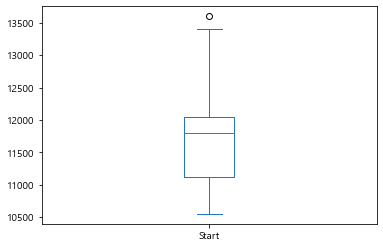

In [31]:
# [과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.
Q1 = df.Start.quantile(.25)
Q3 = df.Start.describe()['75%']
IQR = Q3-Q1
print(Q1,Q3,IQR)
print(Q1-(1.5*IQR),Q3+(1.5*IQR))
display(df.Start.plot(kind='box'))
df1 = df.sort_values('Start',ascending=False)
display(df1.loc[(df1.Start>(Q3+1.5*IQR))|(df1.Start<(Q1-1.5*IQR)),'Start'])
display(df1.Start.head(2),df1.Start.tail(2))
print('''lower whisker: 10,550
upper whisker: 13,400''')

### [과제] df_ep 데이터프레임으로 다음을 수행하세요
- 선 그래프 그리기
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
- 'south' 칼럼의 box plot
 

In [44]:
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
df_ep.set_index('year',inplace=True)
df_ep.head()

,south,north
year,,
1990,1077,277
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231


<AxesSubplot:xlabel='year'>

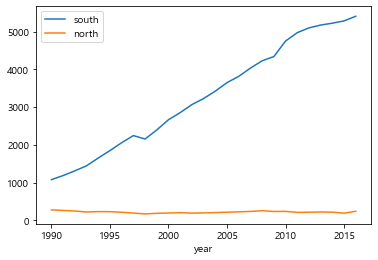

In [49]:
# 선 그래프 그리기
df_ep.plot()

<AxesSubplot:xlabel='year'>

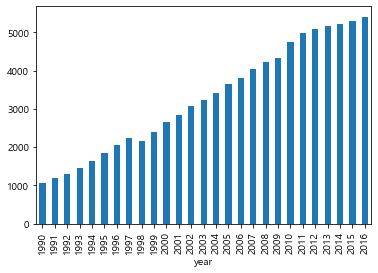

In [46]:
# 'south' 칼럼의 막대그래프
df_ep.south.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

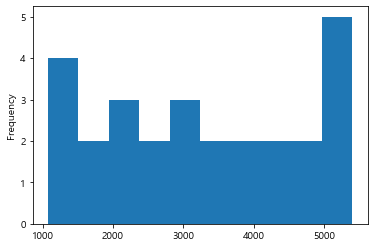

In [47]:
# 'south' 칼럼의 히스토그램
df_ep.south.plot(kind='hist')

<AxesSubplot:>

,south,north
year,,
2014,5220,216
2015,5281,190
2016,5404,239


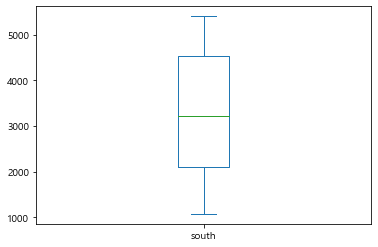

In [48]:
# 'south' 칼럼의 box plot
display(df_ep.south.plot(kind='box'))
df_ep.tail(3)

In [53]:
# [과제] df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 5개 이상 기술하세요
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl')
df_auto.loc[df_auto.horsepower=='?','horsepower']=np.nan # 6개의 ?값 처리
df_auto.dropna(subset=['horsepower'],inplace=True)
df_auto.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


Text(0, 0.5, 'Weight')

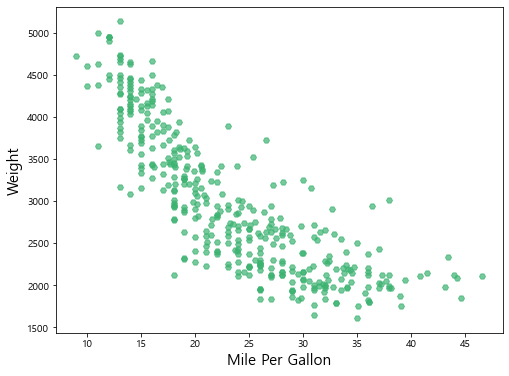

In [54]:
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='mediumseagreen',marker='H',alpha=0.7)
plt.xlabel('Mile Per Gallon',size=15)
plt.ylabel('Weight',size=15)
# 무게가 많이 나갈수록 연비가 떨어짐. 전체적으로 반비례 그래프의 양상을 보이고 있다.

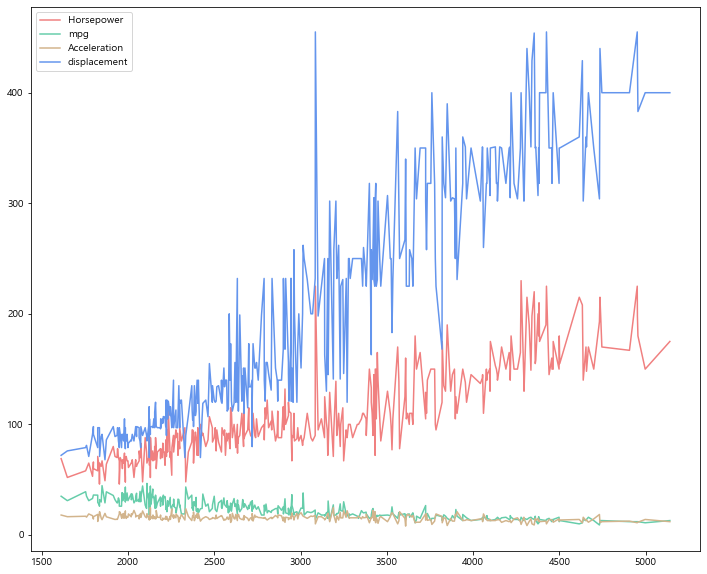

In [55]:
# 무게에 따른 각 컬럼의 값 시각화
df1 = df_auto.sort_values('weight')
x = df1.weight
y1 = df1.horsepower
y2 = df1.mpg
y3 = df1.acceleration
y4 = df1.displacement


plt.figure(figsize=(12,10))
plt.plot(x,y1,color='lightcoral')
plt.plot(x,y2,color='mediumaquamarine')
plt.plot(x,y3,color='tan')
plt.plot(x,y4,color='cornflowerblue')
plt.legend(labels=['Horsepower','mpg','Acceleration','displacement'])

# 무게에 따른 마력은 대체로 비례하는 경향. 물론 편차가 크긴 하다.
# 무게에 따른 연비는 감소하는 경향. 산점도로 봤을 때 반비례 그래프를 그린다
# 무게에 따른 가속의 경우 감소한다. 값이 작아서 미미하게 보이지만 확실하게 줄어들고 있음
# 무게에 따른 배기량은 편차가 정말 크지만 정비례에 가깝게 가고 있음.

# 일반적인 상식으로는 차체가 클수록(무게가 많이 나갈수록) 연비가 떨어지고 배기량도 커지고,
# 소위 말해 '유지비가 많이 든다'고 느낄 수 있는 가능성이 늘어남.
# 물론 그만큼 힘이 좋아 잘 나가기는 할 것이다.
# 물론 몇몇 데이터를 보면 차량 무게가 커도 꽤 효율적인 성능을 보여주고 있는 것들이 몇 있는데
# 이런 차를 사야 후회를 덜 하겠지. 다음에 차를 사게 되면 이렇게 통계적으로 시각화해서 사야겠음.
# 실린더도 넣어봤는데 그건 차량 무게와는 큰 상관이 없는 듯함.

# 지금은 x축에 차량 무게만 넣어놨는데, 이걸 토대로
# mpg와 마력 간 관계(반비례)나 mpg와 배기량(반비례), 마력과 배기량(비례)의 상관관계를 유추할 수 있음 

In [57]:
df_auto.corr() # 종합적으로는 여기서 확인사살 가능합니다.
# 너무 비슷한 경향의 친구들은 똑같은 정보를 중복적으로 주는 셈이라 과대적합이 발생할 우려가 있다
# 예를 들어 배기량은 실린더가 많을수록 높아지니까 굳이 배기량과 실린더를 같이 볼 필요는 없지

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


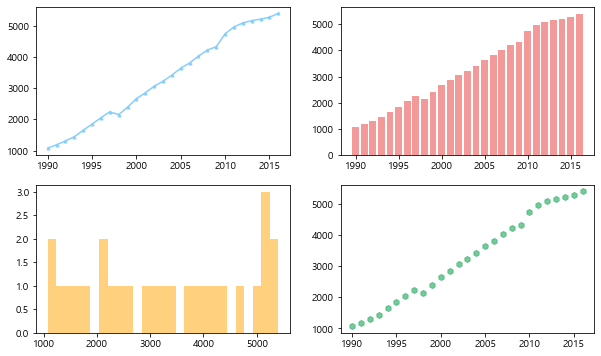

In [41]:
# [과제] 히스토그램, 선, 막대, 산점도 그래프를 서브플롯으로 출력하세요.
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
df_ep.set_index('year',inplace=True)
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

plt.xlabel
ax1.plot(df_ep.south,color='lightskyblue',marker='^',markersize=3)
ax2.bar(df_ep.index,df_ep.south,color='lightcoral',width=0.8,alpha=0.8)
ax3.hist(df_ep.south,bins=len(df_ep),color='orange',alpha=0.5)
ax4.scatter(df_ep.index,df_ep.south,color='mediumseagreen',alpha=0.7,marker='h')

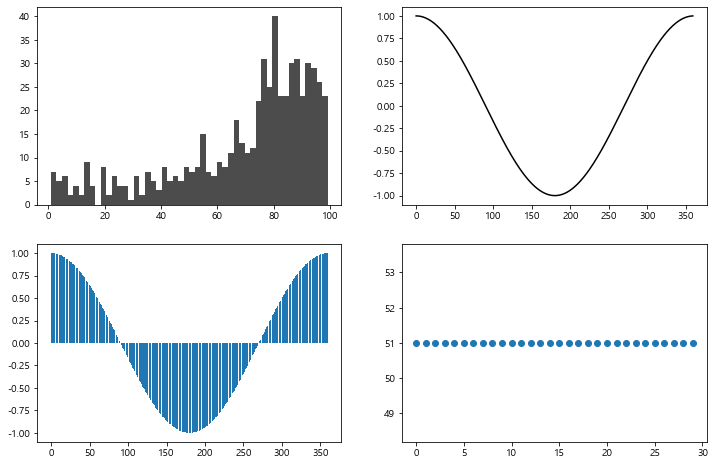

In [42]:
import math
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#=======================히스토그램=======================
num=np.zeros(600)
for i in range(100): num[i]=np.random.randint(1,45)
for i in range(100,250): num[i]=np.random.randint(45,75)
for i in range(250,600): num[i]=np.random.randint(75,100)    
ax1.hist(num, bins = 50, color ='k',alpha = 0.7) 
#=======================선=======================
x=np.arange(360)
y=[]
for i in x:
    a=math.cos(math.pi*(i/180))
    y.append(a)    
ax2.plot(x,y,  color = 'k')
#=======================막대=======================
ax3.bar(x,y,width=0.8)
#=======================산점도=======================
sc_x=np.arange(30)
sc_y=np.full(30,51)
ax4.scatter(sc_x,sc_y)


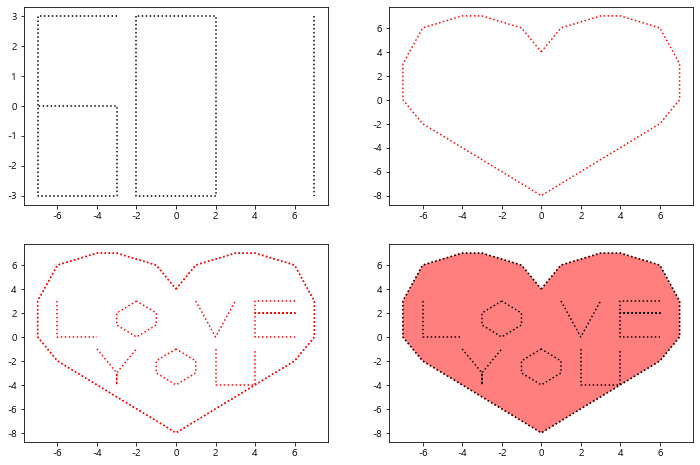

In [58]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = [0,1,3,4,6,7,7,6,5,4,3,0,-3,-4,-5,-6,-7,-7,-6,-4,-3,-1,0]
y = [4,6,7,7,6,3,0,-2,-3,-4,-5,-8,-5,-4,-3,-2,0,3,6,7,7,6,4]

def heart(axis):
    axis.plot(x,y,'red',linestyle=':')

def loveu(axis,color):
    x1 = [0,1,3,4,6,7,7,6,5,4,3,0,-3,-4,-5,-6,-7,-7,-6,-4,-3,-1,0]
    y1 = [4,6,7,7,6,3,0,-2,-3,-4,-5,-8,-5,-4,-3,-2,0,3,6,7,7,6,4] ; axis.plot(x1,y1,color,linestyle=':')
    x2 = [-6,-6,-4]
    y2 = [3,0,0] ; axis.plot(x2,y2,color,linestyle=':')
    x3 = [-2,-3,-3,-2,-1,-1,-2]
    y3 = [3,2,1,0,1,2,3] ; axis.plot(x3,y3,color,linestyle=':')
    x4 = [1,2,3]
    y4 = [3,0,3] ; axis.plot(x4,y4,color,linestyle=':')
    x5 = [6,4,4,6,4,4,6]
    y5 = [3,3,2,2,2,0,0] ; axis.plot(x5,y5,color,linestyle=':')
    x6 = [-4,-3,-3,-3,-2]
    y6 = [-1,-3,-4,-3,-1] ; axis.plot(x6,y6,color,linestyle=':')
    x7 = [0,-1,-1,0,1,1,0]
    y7 = [-1,-2,-3,-4,-3,-2,-1] ; axis.plot(x7,y7,color,linestyle=':')
    x8 = [2,2,4,4]
    y8 = [-1,-4,-4,-1] ; axis.plot(x8,y8,color,linestyle=':')

def class601(axis):
    x9 = [-3,-7,-7,-3,-3,-7]
    y9 = [3,3,-3,-3,0,0] ; axis.plot(x9,y9,'black',linestyle=':')
    x10 = [-2,-2,2,2,-2]
    y10 = [3,-3,-3,3,3] ; axis.plot(x10,y10,'black',linestyle=':')
    x11 = [7,7]
    y11 = [3,-3] ; axis.plot(x11,y11,'black',linestyle=':')

class601(ax1)
heart(ax2)
heart(ax3)
loveu(ax3,'red')
heart(ax4)
loveu(ax4,'black')
ax4.fill(x,y,'r',alpha=0.5)